In [1]:
%matplotlib inline

# Don't forget: Download the importstatements that are specific for this project.
# This will import additional packages and functions that are project specific.
from importstatements import *
css_styling()

$
\newcommand{\fsamp}{{F_s}}
\newcommand{\tsamp}{{T_s}}
\newcommand{\unit}[1]{\text{\,#1}}
\newcommand{\tmidx}{n}
\newcommand{\tds}[2][\tmidx]{{#2(#1)}}
\newcommand{\matcmd}[2][(\cdot)]{\texttt{#2}#1}
\renewcommand{\matcmd}[2][(\cdot)]{\mathrm{#2}#1}
\newcommand{\fcn}[1]{{\text{#1}}}
\newcommand{\bigcb}[1]{{\big\{#1\big\}}} 
\newcommand{\Bigcb}[1]{{\Big\{#1\Big\}}}
\newcommand{\bigsb}[1]{{\big[#1\big]}} 
\newcommand{\Bigsb}[1]{{\Big[#1\Big]}}
\newcommand{\biggsb}[1]{{\bigg[#1\bigg]}}
\newcommand{\pyt}{\matcmd[]{Python}}
\newcommand{\fds}[2][z]{#2(#1)}
$
# Introduction to Digital Filters and (IIR) Filter Design

This exercise will give you hands-on experience in the understanding of digital filters as well as allowing you to design useful IIR filters. The exercises on IIR filter design will cover the tools we have learnt in the lecture for designing simple IIR filters as well as give you some practise in the design of more complex filters using standard toolboxes.

## Exercise: Understanding different filter representations

Consider the following relation between the input signal $x(n)$ and the output signal $y(n)$.

$$y(n) = 0.5*x(n)-0.5*x(n-2)-0.2\,y(n-1)-0.2\,y(n-2)+0.8\,y(n-3) $$

As we have seen in the lecture, this defines a filtering operation on $x(n)$. We shall now examine the filter in its different representations.

### Impulse response representation
<div class="alert alert-info">

**Task**

Plot the impulse response of this filter. For this, proceed as follows:
    
* Generate the input signal to be a Kronecker's delta. Tip: let $x(n)$ be $N$ samples long. How would you represent the Kronecker's delta using this signal?
* Compute the output signal $y(n)$ corresponding to this input. If $x(n)$ is properly defined, $y(n)$ should give you the first $N$ samples of the impulse response.
* Plot the impulse response now, for $N=10$ and $N=100$ samples. 
* Label the axes clearly!

</div>

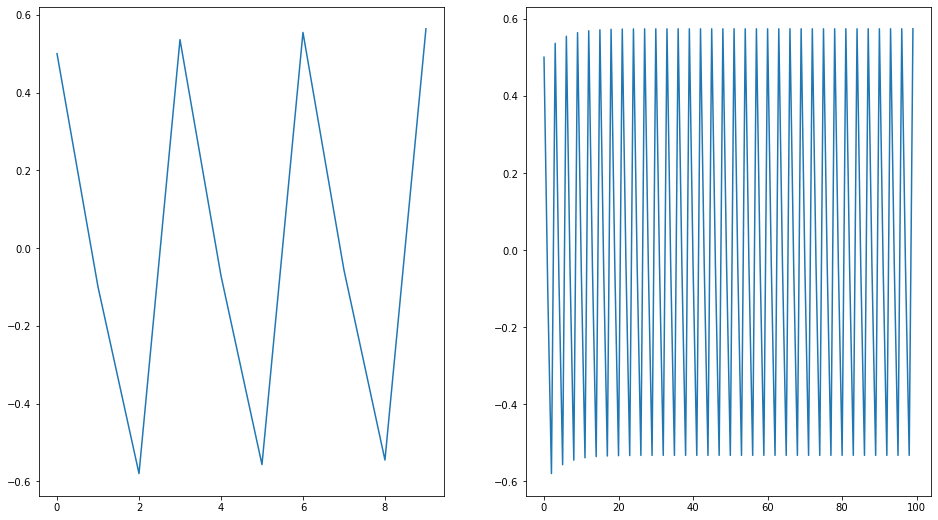

In [2]:
# Code cell: computing and plotting the impulse response.
# Write your code here
N = 10
d = np.zeros(N)
d[0] = 1
h = np.zeros(N+3)
for i in range(2,N+3):
    h[i] = 0.5*d[i-3] - 0.5*d[i-5] - 0.2*h[i-1] -0.2*h[i-2] +0.8*h[i-3] 
h = h[3:]

fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(h)

N = 100
d = np.zeros(N)
d[0] = 1
h = np.zeros(N+3)
for i in range(2,N+3):
    h[i] = 0.5*d[i-3] - 0.5*d[i-5] - 0.2*h[i-1] -0.2*h[i-2] +0.8*h[i-3] 
h = h[3:]

ax[1].plot(h)



<div class="alert alert-info">
    
**Task** Based on the plots above, answer the following (briefly!)
    
* What do you observe about $h(n)$ as $n$ increases? From this, what can you conclude about the asymptotic nature of $h(n)$? 
* What can you say about the stability of the filter based on this?
Write your answer below.
    
</div>

<div class="alert alert-success">
<span style="color:black">

h(n) reaches a local maximum for every n = 3*k with k an integer. h(n) reaches a local minimum for every n = 3*k + 2. The function oscillates continuously with the local maxima reaching the value 0.57377049180328 and the local minima reaching -0.532786885245903.
This filter is not stable since the impulse response doesn't die out with increasing n.

</span>
</div>
    

In the first block, we looked at the impulse response. Now we shall examine the frequency response. For this, however, it is necessary to compute the transfer function $H(z)$ in the form $H(z) = B(z)/A(z)$.

<div class="alert alert-info">
    
**Task**

Rearrange the equation and compute the transfer function as $H(z) = \dfrac{Y(z)}{X(z)} = \dfrac{B(z)}{A(z)}$. 

Write your answer below.
    
</div>

<div class="alert alert-success">

Please write your answer here:

$H(z) = (0.5-0.5*z^-2)/(1+0.2*z^-1+0.2*z^-2-0.8*z^-3)$
    
</div>    

### Pole-zero representation of the filter

Now we shall factorise $A(z)$ and $B(z)$ to obtain the *zeroes* and *poles* of the filter and, thereby, look at its representation in the $\mathcal{Z}$-plane. To do this carry out the following steps:
<div class="alert alert-info">   

**Task**
    
* Write $A(z)$ and $B(z)$ in the standard form given in the lecture notes, using the positive powers of $z$. 
    
</div>    

<div class="alert alert-success">
    
* $\fds{A} = z*0.5*(z^2-1)$  
* $\fds{B}= z^3+0.2*z^2+0.2*z-0.8$    
   
</div>    

Now we will plot the pole-zero representation. Unfortunately, `Python` is (as yet) not smart enough to recognise polynomials as we write them, so the first step would be to convert the polynomials into a form that `Python` can understand. The simplest way is a `list`. 
<div class="alert alert-info">
As a first step, express $\fds{A}$ and $\fds{B}$ as lists `Az` and `Bz` respectively.
    
</div>

**Tip:** you can use `numpy arrays` for this. For a list `Dz` corresponding to a polynomial $\fds{D}$, the first element of the list corresponds to the coefficient of $\fds{D}$ with the highest power of $z$ and the last element corresponds to the coefficient of $z^0$.


Well done! Now, with this representation, we can manipulate, analyse and otherwise play with the polynomials.

<div class="alert alert-info">
    
* Factorise $\fds{A}$ and $\fds{B}$. Use `np.roots` for this. Print these values.
* Use the function `PoleZeroPlot(Bz,Az)` to compute and plot the poles and zeroes on the $\mathcal{Z}-$plane. See if the plotted poles and zeros agree with the roots you found in the previous step.

</div>    

zeros: [ 1. -1.  0.]
poles: [-0.5+0.8660254j -0.5-0.8660254j  0.8+0.j       ]
Poles are plotted using x and zeros as filled in circles o.


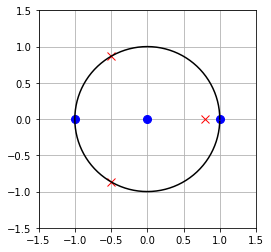

In [3]:
# Write your code for the pole-zero representation here
Bz = [0.5,0,-0.5,0]
Az = [1,0.2,0.2,-0.8]
# Print the roots of Bz and Az using np.roots()
poles = np.roots(Az)
zeros = np.roots(Bz)
print('zeros:',zeros)
print('poles:',poles)
# Make the pole-zero plot.
PoleZeroPlot(Bz,Az)


<div class="alert alert-info">

* List your observations and conclusions regarding the filter based on these poles and zeroes. 
* How does this match with the conclusions you made on $h(n)$ previously? Comment!

</div>    

<div class="alert alert-success">

Since 2 poles lie on the unit circle (|z| = 1), the filter is not stable. This confirms the result in the previous exercise.

</div>


### Frequency response

Based on the polynomials $A(z)$ and $B(z)$ we previously obtained, we shall now proceed with the analysis of the frequency characteristics of this filter. We shall now compute the $H(fT_s)$. To do this we shall use the built-in function `scipy.signal.freqz`.

<div class="alert alert-info">

**Tasks**
    
* Read the documentation of `scipy.signal.freqz` 
* Use this to compute the frequency response of the filter for $N=1024$ equally spaced frequencies in the range $f\in[0,\fsamp/2]$. Tip: what *normalised* frequency range does this correspond to?
* Plot the amplitude response $A(fT_s)$ *in dB scale* across the *normalised* frequency axis.
* Plot the *phase* response on the chosen $fT_s$ axis.

</div>

0.3333333333333333


<ipython-input-4-c978a5d68b56>:5: RuntimeWarning: divide by zero encountered in log10
  A = 20*np.log10(np.abs(Hf))


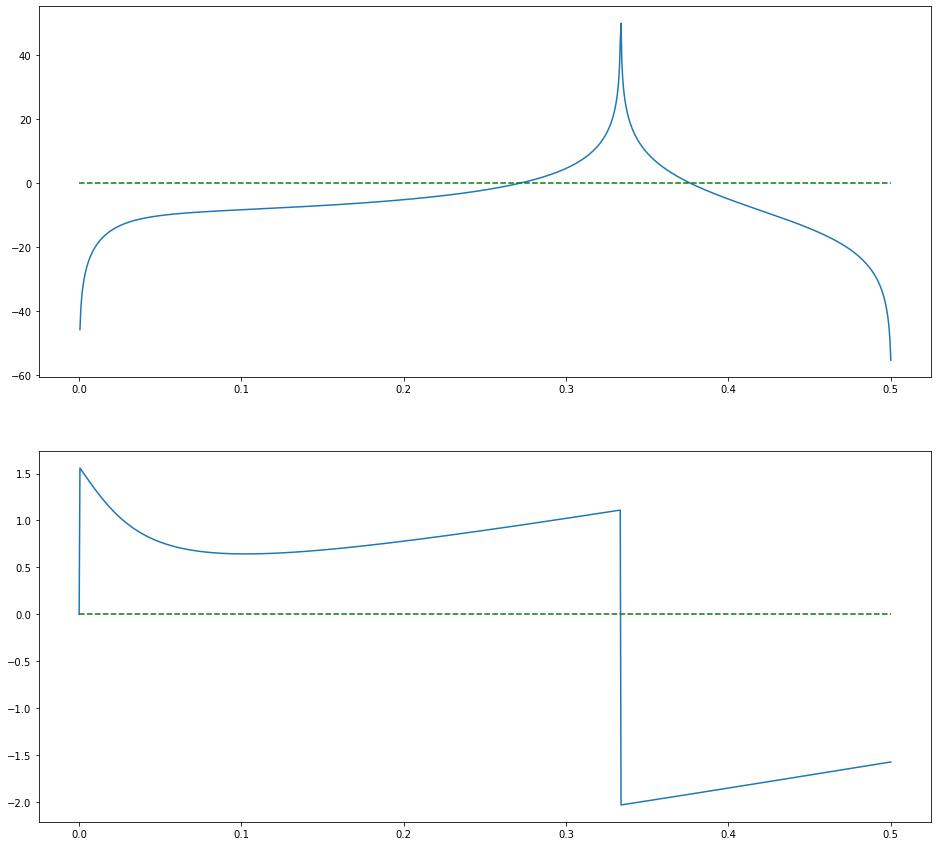

In [4]:
# Write your code here
f,Hf = signal.freqz(Bz,Az,worN=1024)
fs = 2*f[-1]
Ts = 1/fs
A = 20*np.log10(np.abs(Hf))
phase = np.angle(Hf)

fig,ax = plt.subplots(2,1,figsize = (16,15))
ax[0].plot(f*Ts,A)
ax[0].plot(np.linspace(0,0.5,10),np.zeros(10),'g--')
ax[1].plot(f*Ts,phase)
ax[1].plot(np.linspace(0,0.5,10),np.zeros(10),'g--')

#f_,Hf_ = signal.freqz(Bz,Az,worN=1024,whole = True)
#A_ = 20*np.log10(np.abs(Hf_))
#ax[2].plot(f_*Ts,A_)
#ax[2].plot(np.linspace(0,1,10),np.zeros(10),'g--')

pole0 = poles[0]
print(np.angle(pole0)/2/np.pi)

<div class="alert alert-info">

**Task** 

Based on the amplitude and phase response plots, answer the following questions:
    
1. Is the amplitude response what you expect intuitively?
1. What is the form of the phase response (is it linear or non-linear)? Use the `unwrap` function if you observe sudden jumps in the phase response due to wraparound at $\pm\pi$.
1. Is this form of phase response what you expect for this filter?    
1. Do you see sudden jumps in the phase response? If so, where, and of what magnitude? Can you explain why?    

</div>


<div class="alert alert-success">
    
The amplitude response shows that this filter is a band pass filter. This was expected since there are two poles (complex conjugates) lying on the unit circle. They boost the signal at the frequencies corresponding to these poles ($fT_s = \phi/(2\pi) = 0.33333$ with $\phi$ the phase of the pole). It is also visble that the filter fully suppresses the signal at $f = 0$ ($fT_s = 0$) and $f = f_s/2$  (the Nyquist frequency - half of the sampling frequency, thus at $fT_s = 0.5$).
    
The face response is non-linear: this is visible in the graph and confirmed by the lack of symmetry in h(n) around midpoint (slide 22). There is a jump in the phase at $fT_s = 0.3333$, the frequency corresponding to the poles on the unit circle. This is again expected due to (formula on slide 16). When the frequency lies below this critical value, the angle is smaller than 90°. Once the frequency becomes slightly higher than the critical value, the angle suddenly increases with 180° or $\pi$. This is depicted in the figure below. 
</div>


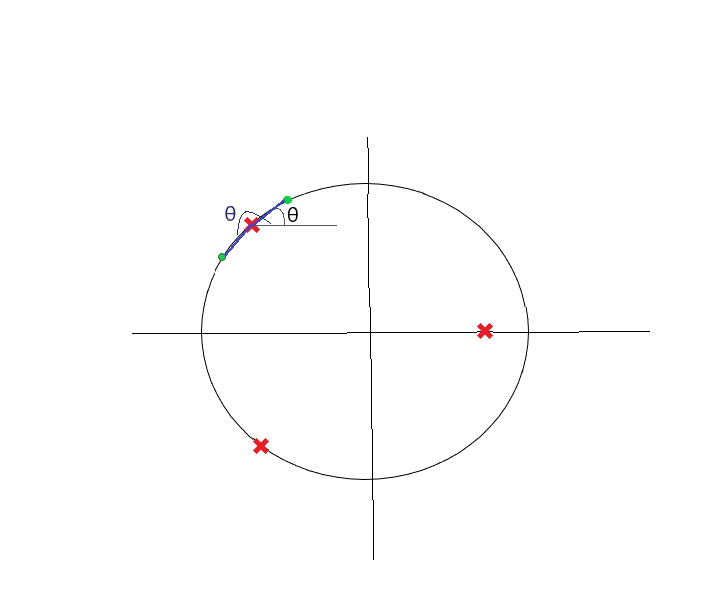

In [5]:
from IPython import display
display.Image("circle.png")

-----------

## Understanding the effect of poles and zeroes in a filter's frequency response

As seen in the lecture, a filter's characteristic is determined by the location of its poles and zeroes. In this exercise, we shall familiarise ourselves with this concept and visualise the effect of different placements of these components such as:

- general effect of a pole and zero
- moving a pole closer or away from unit circle and observing the frequency response 
- what if a pole and zero are at the same *complex* frequency, but their positions are interchanged (once $|p_m|>|z_m|$ and once $|p_m|<|z_m|$).

For each case, we shall see how our intuitive understanding of the effect matches what we shall observe.


<div class="alert alert-info">
    
1. Consider a filter with a single real-valued pole and zero ($p_0 = 0.8$, $z_0=-1$).
    * Write down $\fds{H}$
    * Comment: what would you expect the amplitude response to look like? What do you expect to happen in the neighbourhood of a pole? What would you expect to happen at frequencies that lie close to a zero?
    
</div>

<div class="alert alert-success">
    
$H(z) = b_0 (z+1)/(z-0.8)$
This is a first order filter, more specifically a low pass filter. The amplitude response will be the largest near the frequency corresponding to the pole: $fT_s = \phi(0.8)/(2\pi) = 0$ and will be zero at the frequency corresponding to the zero: $fT_s = \phi(-1)/(2\pi) = 0.5$.
        
</div>

<div class="alert alert-info">
     
* Plot the amplitude response of this filter and verify your answer. 
    
</div>

Poles are plotted using x and zeros as filled in circles o.


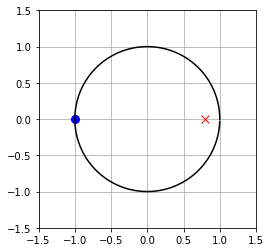

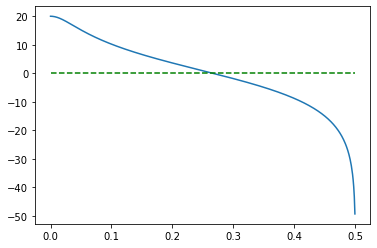

In [6]:
# The frequency response of placing a single pole and zero §(p0=0.8,z0=-1) 
# Write your code here
Bz = [1,1]
Az = [1,-0.8]
PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs
A = 20*np.log10(np.abs(Hf))
phase = np.angle(Hf)

fig,ax = plt.subplots()
ax.plot(f*Ts,A)
ax.plot(np.linspace(0,0.5,10),np.zeros(10),'g--')

<div class="alert alert-info">
    
2. Consider a 2nd order IIR filter with one pole at $p_0 = r_{p}e^{\jmath 2\pi/6}$ and one zero at $z_0 = r_{z}e^{\jmath 2\pi/6}$.
    * If the filter has a real-valued impulse response, find the location of the second pole and zero (i.e., $p_1$ and $z_1$)
    * Write down the corresponding $\fds{A}$ and $\fds{B}$
    * Assume $r_p < r_z$ and $r_p$ and $r_z$ to be close to the unit circle. What would you expect to happen to a signal of frequency $f=\fsamp/6$? Will this be attenuated or boosted? Why?

</div>

<div class="alert alert-success">
    
Since the filter has a real-valued impulse response, the complex poles and zeros come in pairs of complex conjugates.
    
$\fds{B} = (z-r_z e^{\jmath 2\pi/6})(z-r_{z}e^{-\jmath 2\pi/6}) = z^2-2 z r_z cos(2\pi/6)+r_z^2$
    
$\fds{A} = (z-r_p e^{\jmath 2\pi/6})(z-r_{p}e^{-\jmath 2\pi/6}) = z^2-2 z r_p cos(2\pi/6)+r_p^2$
    
Behaviour at $f = F_s/6$: 
At this frequency, signals of frequency will be both attenuated due to the zeros and boosted due to the pole. The result of these combined effects depends on how close the pole and zero lie to the unit circle. Since the zero lies closer to the unit circle than the pole, the attenuating effect will dominate, but the signal will not be fully supressed due to the pole.
</div>
    

<div class="alert alert-info">
    
* Now plot the _amplitude_ response of this filter and verify your conclusions. Assume $r_p = 0.85$ and $r_z=0.95$.
</div>
    

Poles are plotted using x and zeros as filled in circles o.


Text(0.5, 1.0, 'Amplitude response in dB')

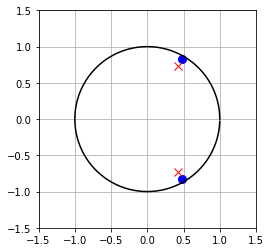

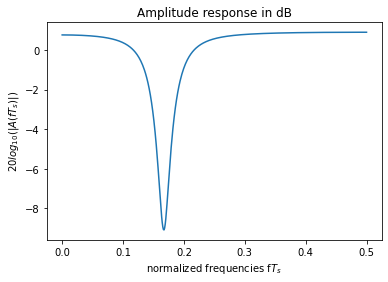

In [7]:
# Amplitude response of 2nd order IIR filter
# Code here.
r_p = 0.85
r_z = 0.95
Az = [1,-2*r_p*np.cos(2*np.pi/6),r_p**2]
Bz = [1,-2*r_z*np.cos(2*np.pi/6),r_z**2]

PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs

A, phase = 20*np.log10(np.abs(Hf)), np.angle(Hf) 

fig, ax = plt.subplots()
ax.plot(f*Ts, A)
ax.set_xlabel('normalized frequencies f$T_s$')
ax.set_ylabel(r'$20log_{10}(|A(fT_s)|)$')
ax.set_title('Amplitude response in dB')

<div class="alert alert-info">
   
    
* Now we shall study the effect of moving the pole away from or closer to the unit circle. For this, keep $r_z$ fixed and perform the following two experiments:
    * plot the amplitude response when $r_p = 0.65$
    * plot the amplitude response when $r_p = 0.9$
</div>
    

Poles are plotted using x and zeros as filled in circles o.
Poles are plotted using x and zeros as filled in circles o.


Text(0.5, 1.0, 'Amplitude response in dB with $r_p$ = 0.9')

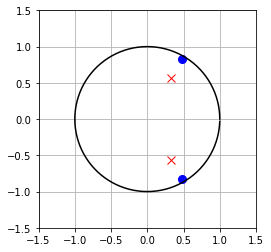

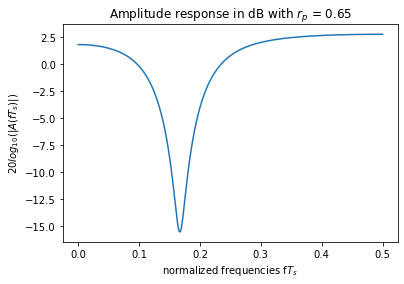

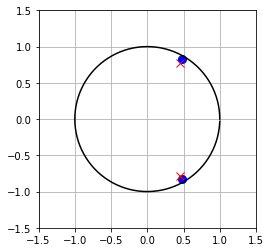

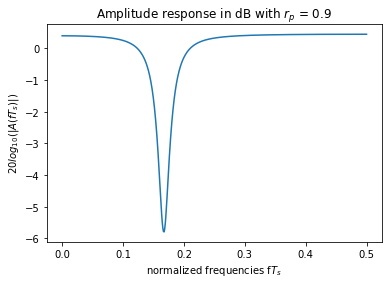

In [8]:
# Effect of moving a pole closer or away from unit circle and observing the frequency response
# place your code here
r_p = 0.65
r_z = 0.95
Az = [1,-2*r_p*np.cos(2*np.pi/6),r_p**2]
Bz = [1,-2*r_z*np.cos(2*np.pi/6),r_z**2]

PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs

A, phase = 20*np.log10(np.abs(Hf)), np.angle(Hf) 

fig, ax = plt.subplots()
ax.plot(f*Ts, A)
ax.set_xlabel('normalized frequencies f$T_s$')
ax.set_ylabel(r'$20log_{10}(|A(fT_s)|)$')
ax.set_title('Amplitude response in dB with $r_p$ = 0.65')

r_p = 0.9
r_z = 0.95
Az = [1,-2*r_p*np.cos(2*np.pi/6),r_p**2]
Bz = [1,-2*r_z*np.cos(2*np.pi/6),r_z**2]

PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs

A, phase = 20*np.log10(np.abs(Hf)), np.angle(Hf) 

fig, ax = plt.subplots()
ax.plot(f*Ts, A)
ax.set_xlabel('normalized frequencies f$T_s$')
ax.set_ylabel(r'$20log_{10}(|A(fT_s)|)$')
ax.set_title('Amplitude response in dB with $r_p$ = 0.9')

<div class="alert alert-info">
    
* What do you observe when the pole moves _away_ from the unit circle ($r_p$ decreases)?
* What do you observe when the pole moves _towards_ from the unit circle ($r_p$ increases)?
* Explain the reason for this behaviour (briefly). 
* Based on the above experiment, briefly explain the effect of placing a zero _on_ the unit circle
</div>

<div class="alert alert-success">
    
When the pole moves away from the unit circle, the boosting effect decreases. This results in more attenuation of signals with this critical frequency. When the pole moves closer to the unit circle, the boosting effect increases, which results in less attenuation of signals with this frequency. The figures confirm this observation: the closer the pole lies to the unit circle, the less low the peak in the amplitude response at this frequency is.
</div>

<div class="alert alert-info">

* What would you expect if the poles and zeros interchange places? Plot the amplitude response in this case.
</div>    

<div class="alert alert-success">
    
Since the pole lies closer to the unit circle than the zero in this case, the boosting effect of the pole will now dominate. This means that there will be an upward peak in the amplitude response at this frequency.
</div>

Poles are plotted using x and zeros as filled in circles o.


Text(0.5, 1.0, 'Amplitude response in dB')

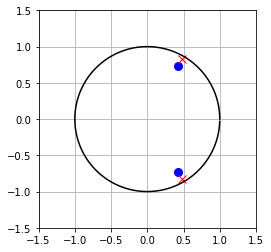

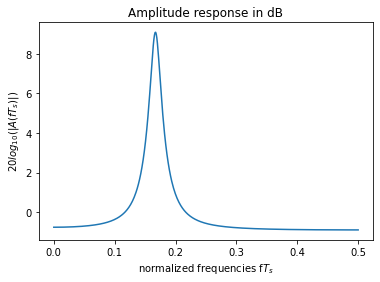

In [9]:
# What if a pole and zero are at the same complex frequency, but their positions 
# are interchanged?
# place your code and plot of amplitude response here
r_p = 0.95
r_z = 0.85
Az = [1,-2*r_p*np.cos(2*np.pi/6),r_p**2]
Bz = [1,-2*r_z*np.cos(2*np.pi/6),r_z**2]

PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs

A, phase = 20*np.log10(np.abs(Hf)), np.angle(Hf) 

fig, ax = plt.subplots()
ax.plot(f*Ts, A)
ax.set_xlabel('normalized frequencies f$T_s$')
ax.set_ylabel(r'$20log_{10}(|A(fT_s)|)$')
ax.set_title('Amplitude response in dB')

-----------

## Design of simple IIR filters

Now that we are familiar with the basic components of digital filters and how their characteristics can be manipulated (e.g. by moving the positions of the poles and zeros), we shall apply this knowledge to the design of a simple, yet useful IIR filters. Specifically, we shall consider here, the design of a *notch* filter. This filter can be used to zero a specific frequency. As we shall see in the practical example that follows, this approach can be applied to remove harmonic disturbances from interfering sources (e.g., power supply hum affecting the measurement of biomedical signals is a frequently seen source of disturbance in the real world).

We shall start with definining some helper functions in this regard, especially to form the polynomials $A(z)$ and $B(z)$. 

### Concept: Multiplication of two polynomials

When designing filters with complex poles and zeroes, we know that these poles and zeros are always accompanied by their complex conjugate, if the filter has a real-valued impulse response (the case for most practical filters). 

In other (more mathematical) words, if $z-z_0$ is the root of a polynomial $D(z) = d_0 + d_1z^{-1}+d_2z^{-2}\ldots$ with $\{d_0,d_1,\ldots\}\in\mathbb{R}$, and if $z_0\in\mathbb{C}$, then $z-z_0^{\ast}$ is also a root of $D(z)$. We can group such complex pairs together to get a second-order polynomial with real-valued coefficients as $(z-z_0)(z-z_0^{\ast}) = z^2-2\text{Re}(z_0)\,z+|z_0^2|$.

Consequently, you will write a function `GetComplexPairPoly` that, given a first order polynomial with a complex root, returns a resulting polynomial that is of second order, by multiplying the input polynomial with its complex conjugate. To help you in this, a helper function `PolynomialMultiply` is given to you below.

In [10]:
# Function to multiply two polynomials, expressed in the same way 
# (i.e. either in increasing powers or in decreasing powers of z)
def PolynomialMultiply(polyA,polyB):
    return np.convolve(polyA,polyB)

In writing the above function we have exploited the fact that multiplying two polynomials
$D_1(z) = d_{10} + d_{11}z^{-1} + \ldots$ and
$D_2(z) = d_{20} + d_{21}z^{-1} + \ldots$
yields a resulting polynomial $D(z) = D_1(z)D_2(z)$ whose coefficients can be easily obtained by *convolving* the sequences $\{d_{10},d_{11},\ldots\}$ and $\{d_{20},d_{21},\ldots\}$.

<div class="alert alert-info">

**Task**    
* Write the function `GetComplexPairPoly` as mentioned above. You may use the `PolynomialMultiply` function defined above. 
* Verify the function is correctly implemented.   
</div>

In [11]:
# Function to return polynomial when given a first order polynomial 
# with a complex root. 
def GetComplexPairPoly(polyA):
    root = np.roots(polyA)
    complex_conj = np.abs(root[0]) * np.exp(-1j * np.angle(root[0]))
    polyB = [1,-complex_conj]
    return PolynomialMultiply(polyA,polyB)

In [12]:
# Design appropriate inputs to verify the function you have just written. 
# Code goes here.
print(GetComplexPairPoly([1,-(2+3*1j)]))
# (z-(2+3j))(z-(2-3j)) = z^2 - 4z + 4+9
print(GetComplexPairPoly([1,-5j]))
# (z-5j)(z+5j) = z^2 + 25

[ 1.+0.0000000e+00j -4.-4.4408921e-16j 13.+8.8817842e-16j]
[ 1.000000e+00+0.0000000e+00j -3.061617e-16+0.0000000e+00j
  2.500000e+01+1.5308085e-15j]


### Design of a notch filter based on narrowband approximation
The following are the filter specifications:
1. Frequency $F_c$ should be *completely* suppressed $(0<F_cT_s<1/2)$
2. The 3-dB *bandwidth* is $B\tsamp = \Delta$
3. Leave other frequencies untouched on average

Based on the experiments you have done so far and on the lecture notes, we can easily approach this design in a step-by-step manner. 

First answer the following questions before proceeding with the design.

<div class="alert alert-info">
    
1. What is the *minimum* order of this filter?
1. Where would you put the *poles* and *zeroes* of this filter? **Tip:** see the formulation of the BPF from the lecture notes.
1. Based on the above, write your answer as an expression for the filter $\fds{H}$ in its standard form.   
</div>

<div class="alert alert-success">
The normalized frequency $F_cT_s$ lies between 0 and 1/2, which means $e^{j 2\pi F_cT_s}$ lies somewhere between 0 and $\pi$ on the unit circle. There needs to be a zero with the same phase in order to attenuate the signal for this frequency. This zero is thus a complex value which means the complex conjugate should also be a zero (in case of a real-valued impulse response). We conclude that the minimal order of this filter is 2. In order to completely suppress the frequency $F_c$, this zero needs to lie on the unit circle. The poles should be chosen such that for z=0 (f=0) and z=-1 (f=$F_s$/2), the amplitude response equals 1 (these frequencies are not affected by the filter).

$ H(z) = b_0 \dfrac{(z- e^{j 2\pi F_cT_s})(z- e^{-j 2\pi F_cT_s})}{(z-p_0)(z-p_1)}$


</div>

We can apply the narrowband approximation to the above, simplifying computations somewhat. As a quick exercise, 

<div class="alert alert-info">
    
Derive the form of the amplitude response $A(fT_s)$ for frequencies in the _direct_ neighbourhood of $F_c$ in terms of the *narrowband* approximation. Assume, hereby, that $A(fT_s)$ at any frequency close to a pole or zero is mainly dominated by the effect of that pole or zero (i.e., apply the approximation to $\fds{B}$ and $\fds{A}$).
</div>


<div class="alert alert-success">
Your answer here
    
$A(fT_s) = b_0 \dfrac{\epsilon (e^{j 2\pi fT_s}- e^{-j 2\pi F_cT_s})}{(e^{j 2\pi fT_s}-p_0)(e^{j 2\pi fT_s}-p_1)}$    
I don't know this for sure.
</div>


From this equation and the constraint that the amplitude response should asymptotically approach 1 for the end frequencies, we can derive the necessary filter parameters. Luckily, this has already been done for you in the function `NotchFilter`. This function has the following form:

`Bz,Az = NotchFilter(FcTs,BTs)`

Where `FcTs` is the frequency you want to suppress and `BTs` represents the 3-dB bandwidth (all expressed in terms of the _normalised_ frequency)    

In [13]:
# Applying the concept of a notch filter to remove line or other harmonic noise
# Defining the notch filter here.
def NotchFilter(FcTs,BTs):
    Q = FcTs/BTs
    Bz,Az = signal.iirnotch(FcTs,Q=Q,fs=1)
    return Bz,Az

<div class="alert alert-info">

Verify this function. Plot the amplitude response of this filter for $F_cT_s = 1/6$ and $BT_s = \dfrac{1}{10\pi}$. 
</div>

Poles are plotted using x and zeros as filled in circles o.


Text(0.5, 1.0, 'Amplitude response in dB')

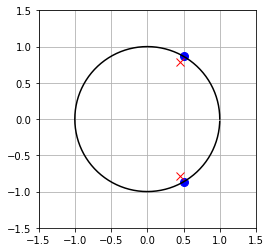

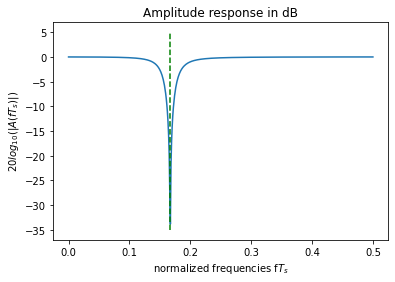

In [14]:
# Verify your design for the above specifications (use the frequency response)
# Code here.
Bz,Az = NotchFilter(1/6,1/10/np.pi)
PoleZeroPlot(Bz,Az)

f,Hf = signal.freqz(Bz,Az)
fs = 2*f[-1]
Ts = 1/fs

A, phase = 20*np.log10(np.abs(Hf)), np.angle(Hf) 

fig, ax = plt.subplots()
ax.plot(f*Ts, A)
ax.plot(np.ones(10)/6,np.linspace(-35,5,10),'g--')
ax.set_xlabel('normalized frequencies f$T_s$')
ax.set_ylabel(r'$20log_{10}(|A(fT_s)|)$')
ax.set_title('Amplitude response in dB')

---------------------
## Practical application of the notch filter

A sample EEG signal (data from Physionet) is included. This is corrupted with some interfering, harmonic noise. We shall apply the notch filter to remove this. Indeed, this exercise shall provide you with a good idea of how signal analysis and cleanup takes place in practice.

<div class="alert alert-info">
    
Step 1: Load the data. Use code below for this. You may examine the variables loaded by looking at `EEGData`.

In [15]:
EEGData = np.load('ex3_notch_filter_eeg.npz')
x = EEGData['noisyIn']  # The noise-corrupted EEG signal
fs = EEGData['sampFrq'] # The sampling frequency of this signal

Step 2: Analyse the signal to see where the interference lies. This is done by looking at the short-time spectrum of the signal. Python provides several ways to do this. Two such approaches are: `signal.welch` and `signal.stft`. Code is provided for you for both these cases. 

<div class="alert alert-info">
    
* Read the comments in the code cells below
* Execute the code and look at the resulting different representations. 

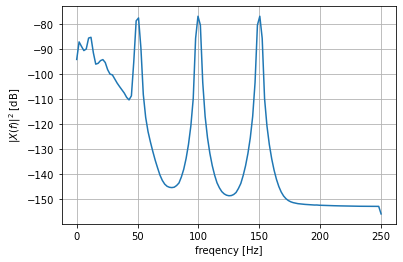

In [16]:
# Short-time power spectrum computation using Welch periodogram
# This yields the smoothed power-spectrum averaged across several short, 
# overlapping windows of the signal.
nfft = 256
overlap = 7*nfft//8
scaleFact = signal.windows.get_window('hann',nfft).sum()
frqVec,psdX = signal.welch(x, fs=fs, window='hann',\
                           noverlap=overlap, nfft=nfft,scaling='spectrum')

# Look at the resulting power spectrum of the signal
fig = plt.figure(figsize=(6,4)); fig.clf()
ax = fig.add_subplot(111)
ax.plot(frqVec,10*np.log10(psdX*scaleFact))
ax.set_xlabel('freqency [Hz]')
ax.set_ylabel('$|X(f)|^2$ [dB]')
ax.grid('on')

<ipython-input-17-e6e8a92a2741>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


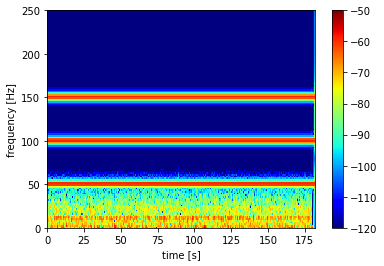

In [17]:
# Short-time periodogram using signal.stft
# Same analysis parameters as Welch, but in this case, the periodogram is 
# not averaged across time, yielding a time-frequency view.

#Add all correct inputs into signal.stft 
frqVec,tAxis,X = signal.stft(x,window='hann',nperseg=nfft,noverlap=overlap,\
                             nfft=nfft, return_onesided=True,axis=0,fs=fs)
X *= scaleFact
# Compute the periodogram
PsiXX = np.abs(X)**2

# Either plot the average along time-axis (which means 1-D plot, similar to Welch estimate)
# or plot a colourful image, which gives a nicer view of the underlying signal spectrum.
fig = plt.figure(figsize=(6,4)); fig.clf()
ax = fig.add_subplot(111,aspect='auto')
xGrid,yGrid = np.meshgrid(tAxis,frqVec)
mesh = ax.pcolormesh(xGrid,yGrid,10*np.log10(PsiXX),cmap='jet',\
                     vmin=-120,vmax=-50,shading='auto')
ax.set_xlabel('time [s]')
ax.set_ylabel('frequency [Hz]')
fig.colorbar(mesh,ax=ax)
fig.show()

Now that we have a way to analyse the signal, let us continue the process:

<div class="alert alert-info">
    
Step 3: From either of the representations, identify the frequencies where the interference originates. 
    
You will see that this is harmonic interference, present through the entire signal. What could be the cause of this interference? 
</div>



<div class="alert alert-success">
    
Three frequencies are present troughout the entire time interval: 50Hz, 100Hz and 150Hz.
The cause of this interference could be due to the equipment. 
    ...
</div>


<div class="alert alert-info">

Step 4: Design the notch filter required. The bandwidth is a parameter to be played with.
    
First, create a separate notch filter for each of the interfering harmonics and combine them into one expression of $\fds{B}$ and $\fds{A}$. You can make use of the `PolynomialMultiply` function defined previously.  
</div>


In [18]:
# Your code goes here: 
# Create a separate notch filter for each harmonic first, then combine them.    
B1,A1 = NotchFilter(50/fs,1/10/np.pi)
B2,A2 = NotchFilter(100/fs,1/10/np.pi)
B3,A3 = NotchFilter(150/fs,1/10/np.pi)
B0 = PolynomialMultiply(B1,B2)
Bz = PolynomialMultiply(B0,B3)
A0 = PolynomialMultiply(A1,A2)
Az = PolynomialMultiply(A0,A3)

<div class="alert alert-info">
    
Step 5: Filter the signal using this combined notch filter. The function `signal.lfilter` can be used for this. It does the convolution for you :) 
    
Play with different values of BW and see which one would be best.
</div>

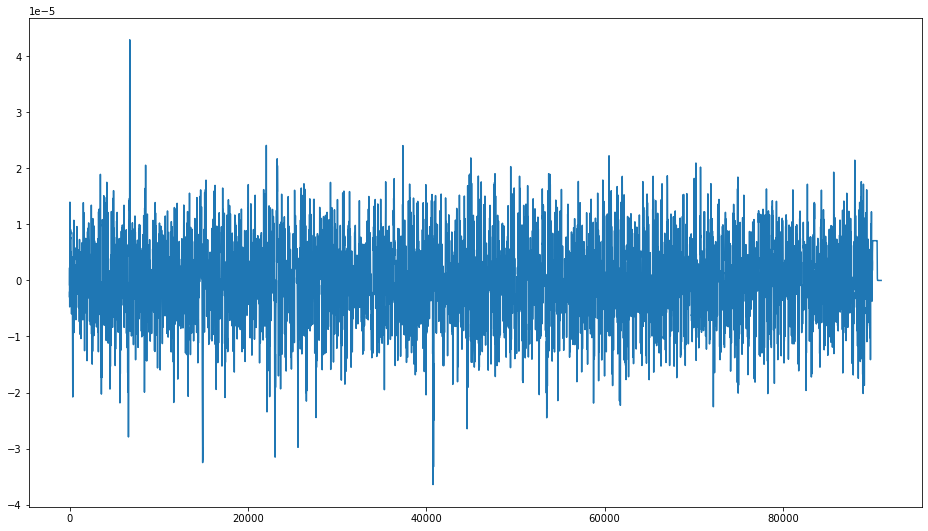

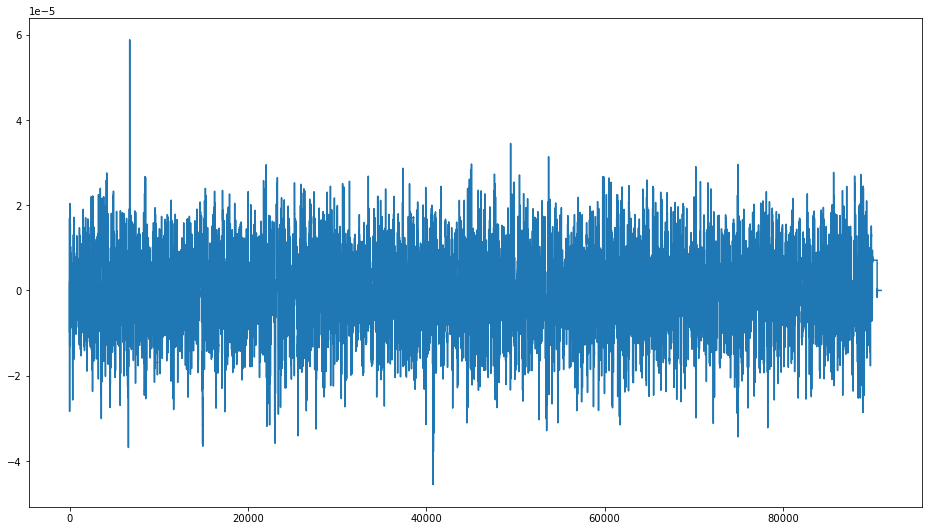

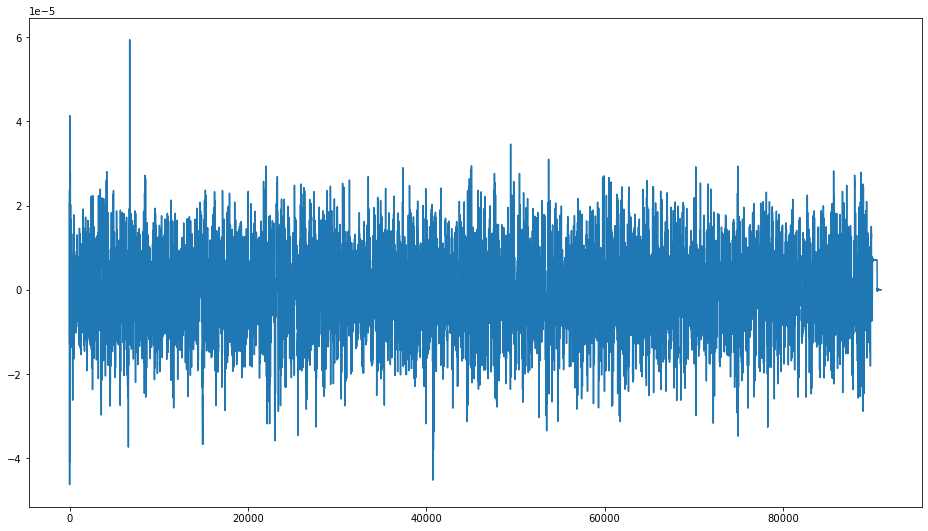

In [19]:
for bw in [1/np.pi,1/10/np.pi,1/100/np.pi]:
    B1,A1 = NotchFilter(50/fs,bw)
    B2,A2 = NotchFilter(100/fs,bw)
    B3,A3 = NotchFilter(150/fs,bw)
    B0 = PolynomialMultiply(B1,B2)
    Bz = PolynomialMultiply(B0,B3)
    A0 = PolynomialMultiply(A1,A2)
    Az = PolynomialMultiply(A0,A3)
    y = np.real(signal.lfilter(Bz,Az,x))
    fig,ax = plt.subplots(figsize=(16,9))
    ax.plot(y)


<div class="alert alert-info">
   
Step 6: Verify that the filter has correctly removed the inteference. Visually you can get a clue by:
    
* computing the power spectrum of the signal using Welch or the STFT method and comparing to the power spectrum of the input 
* plotting the amplitude spectrum of the combined notch filter.
    
How would you say that you have de-noised the signal correctly?  
</div>

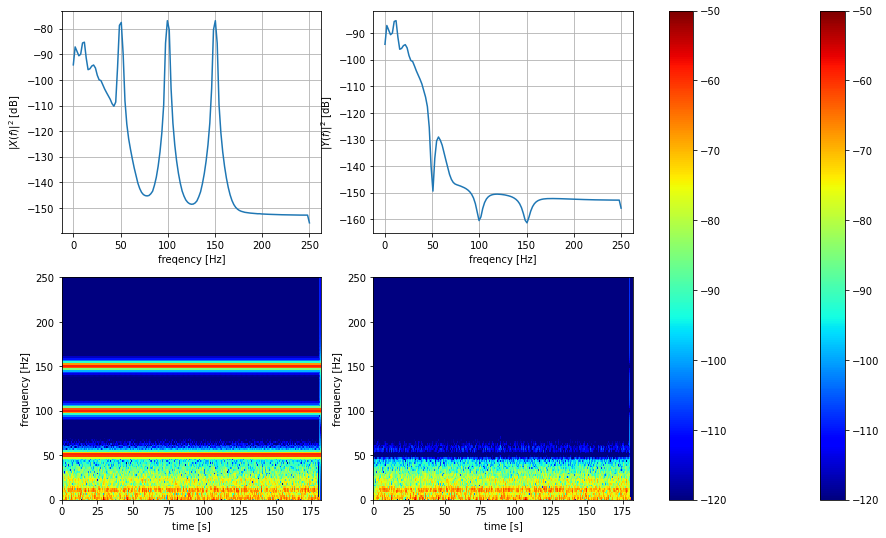

In [20]:
# Replot the spectrum of the filtered signal using Welch or STFT. 
# Compare to the input signal.
B1,A1 = NotchFilter(50/fs,1/10/np.pi)
B2,A2 = NotchFilter(100/fs,1/10/np.pi)
B3,A3 = NotchFilter(150/fs,1/10/np.pi)
B0 = PolynomialMultiply(B1,B2)
Bz = PolynomialMultiply(B0,B3)
A0 = PolynomialMultiply(A1,A2)
Az = PolynomialMultiply(A0,A3)
y = np.real(signal.lfilter(Bz,Az,x))

fig, ax = plt.subplots(2,2,figsize=(16,9))
# Short-time power spectrum computation using Welch periodogram
# This yields the smoothed power-spectrum averaged across several short, 
# overlapping windows of the signal.
nfft = 256
overlap = 7*nfft//8
scaleFact = signal.windows.get_window('hann',nfft).sum()
frqVec,psdX = signal.welch(x, fs=fs, window='hann',\
                           noverlap=overlap, nfft=nfft,scaling='spectrum')

# Look at the resulting power spectrum of the signal
ax[0,0].plot(frqVec,10*np.log10(psdX*scaleFact))
ax[0,0].set_xlabel('freqency [Hz]')
ax[0,0].set_ylabel('$|X(f)|^2$ [dB]')
ax[0,0].grid('on')

scaleFact = signal.windows.get_window('hann',nfft).sum()
frqVec,psdY = signal.welch(y, fs=fs, window='hann',\
                           noverlap=overlap, nfft=nfft,scaling='spectrum')

# Look at the resulting power spectrum of the signal
ax[0,1].plot(frqVec,10*np.log10(psdY*scaleFact))
ax[0,1].set_xlabel('freqency [Hz]')
ax[0,1].set_ylabel('$|Y(f)|^2$ [dB]')
ax[0,1].grid('on')


# Short-time periodogram using signal.stft
# Same analysis parameters as Welch, but in this case, the periodogram is 
# not averaged across time, yielding a time-frequency view.

#Add all correct inputs into signal.stft 
frqVec,tAxis,X = signal.stft(x,window='hann',nperseg=nfft,noverlap=overlap,\
                             nfft=nfft, return_onesided=True,axis=0,fs=fs)
X *= scaleFact
# Compute the periodogram
PsiXX = np.abs(X)**2

# Either plot the average along time-axis (which means 1-D plot, similar to Welch estimate)
# or plot a colourful image, which gives a nicer view of the underlying signal spectrum.
xGrid,yGrid = np.meshgrid(tAxis,frqVec)
mesh = ax[1,0].pcolormesh(xGrid,yGrid,10*np.log10(PsiXX),cmap='jet',\
                     vmin=-120,vmax=-50,shading='auto')
ax[1,0].set_xlabel('time [s]')
ax[1,0].set_ylabel('frequency [Hz]')
fig.colorbar(mesh,ax=ax)

#Add all correct inputs into signal.stft 
frqVec,tAxis,Y = signal.stft(y,window='hann',nperseg=nfft,noverlap=overlap,\
                             nfft=nfft, return_onesided=True,axis=0,fs=fs)
Y *= scaleFact
# Compute the periodogram
PsiYY = np.abs(Y)**2

# Either plot the average along time-axis (which means 1-D plot, similar to Welch estimate)
# or plot a colourful image, which gives a nicer view of the underlying signal spectrum.
xGrid,yGrid = np.meshgrid(tAxis,frqVec)
mesh = ax[1,1].pcolormesh(xGrid,yGrid,10*np.log10(PsiYY),cmap='jet',\
                     vmin=-120,vmax=-50,shading='auto')
ax[1,1].set_xlabel('time [s]')
ax[1,1].set_ylabel('frequency [Hz]')
fig.colorbar(mesh,ax=ax)

<div class="alert alert-success">
    
The peaks at 50Hz, 100Hz and 150Hz have clearly dissapeared, so these frequencies are filtered out of the signal. However, the signal might be filtered too much at 50Hz, also suppressing some useful information.
</div>

---------------------
## Use of `pyFDA` to design more complex filters

You can install pyFDA (locally) from https://pypi.org/project/pyfda/ and play with a GUI that allows you to build diferent filters. 

* how to specify the filter parameters
* see the filter-order vs frequency selectivity trade-off
* view amplitude and phase responses as well as pole-zero plots for these filters (Butterworth, Chebychev, Elliptic). Just play with this and see what is possible.
* Learn to export coefficients and plot, e.g. the amplitude response themselves.